In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cols = ['gpu', 
        'vmemory',
        'cpu',
        'memory_max_bytes',
        'memory_rss',
        'swap',]

In [12]:
!pwd

/mnt/right/TWCC/test_daily


In [4]:
#prefix='./daily0630/'
#prefix2='./new_daily/'
#prefix3='./dis_shape_daily0630/'
prefix4 = './daily0630_2/'
prefix5 = './new_shape/'
x_train = np.load(prefix4+'X_train.npy')
x_train_aug = np.load(prefix5+'X_train.npy')
x_train.shape

(13153, 61, 6)

In [5]:
x_train.shape, x_train_aug.shape

((13153, 61, 6), (13153, 61, 6))

In [6]:
#x_train-x_train_aug

In [7]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})


,gpu,vmemory,cpu,memory_max_bytes,memory_rss,swap
0,93.0,5.174329e+09,192191.765687,3.987726e+09,3.053834e+09,0.0
1,94.0,5.174329e+09,192302.991487,3.987726e+09,3.014767e+09,0.0
2,94.0,5.174329e+09,192680.863865,3.987726e+09,3.057037e+09,0.0
3,95.0,5.174329e+09,192913.767055,3.987726e+09,3.087884e+09,0.0
4,95.0,5.174329e+09,193153.442045,3.987726e+09,2.889769e+09,0.0
...,...,...,...,...,...,...
56,93.0,5.174329e+09,205255.924741,3.987726e+09,3.038847e+09,0.0
57,94.0,5.174329e+09,205392.793759,3.987726e+09,3.042804e+09,0.0
58,70.0,5.174329e+09,205706.317519,3.987726e+09,3.036733e+09,0.0
59,94.0,5.174329e+09,205855.350646,3.987726e+09,3.065434e+09,0.0


,gpu,vmemory,cpu,memory_max_bytes,memory_rss,swap
0,95.000000,5.174329e+09,193153.442045,3.987726e+09,2.889769e+09,0.0
1,92.250000,5.174329e+09,193258.164859,3.987726e+09,3.014788e+09,0.0
2,92.833333,5.174329e+09,193546.494767,3.987726e+09,3.049972e+09,0.0
3,94.500000,5.174329e+09,193779.250953,3.987726e+09,3.051599e+09,0.0
4,94.333333,5.174329e+09,193996.377332,3.987726e+09,3.053355e+09,0.0
...,...,...,...,...,...,...
56,77.000000,5.174329e+09,205001.945709,3.987726e+09,2.928168e+09,0.0
57,93.250000,5.174329e+09,205290.141995,3.987726e+09,3.039836e+09,0.0
58,90.000000,5.174329e+09,205445.047719,3.987726e+09,3.041792e+09,0.0
59,70.000000,5.174329e+09,205706.317519,3.987726e+09,3.036733e+09,0.0


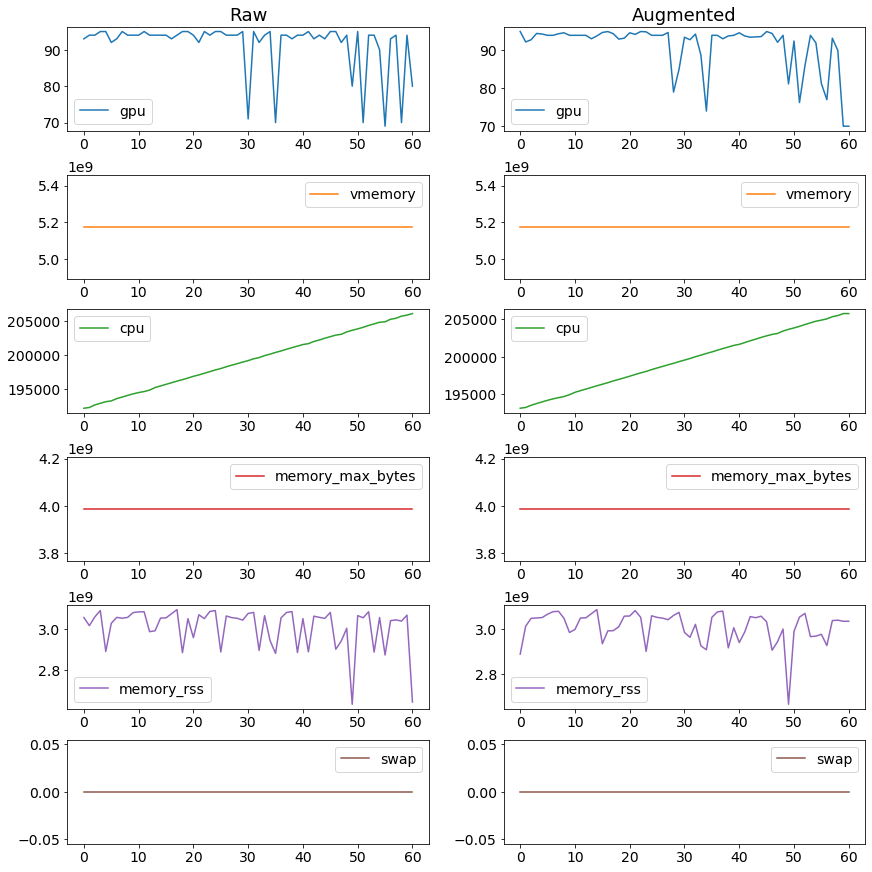

In [11]:
fig, ax = plt.subplots(6, 2, sharey=False, figsize=(12, 12), constrained_layout=True)
#fig.tight_layout()

idx = 0

dfx = pd.DataFrame(x_train[idx], columns=cols)
dfx_aug = pd.DataFrame(x_train_aug[idx], columns=cols)

display(dfx, dfx_aug)
dfx.plot(subplots=True, ax=ax[:,0], figsize=(15,12), sharey=False)
dfx_aug.plot(subplots=True, ax=ax[:,1], figsize=(15,12), sharey=False)


ax[0,0].set_title("Raw", fontsize=18)
ax[0,1].set_title("Augmented",fontsize=18)

plt.savefig('sample_aug.svg', format="svg")
plt.show()

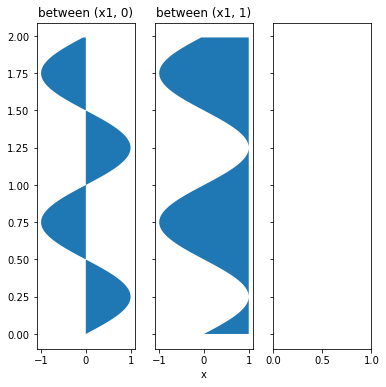

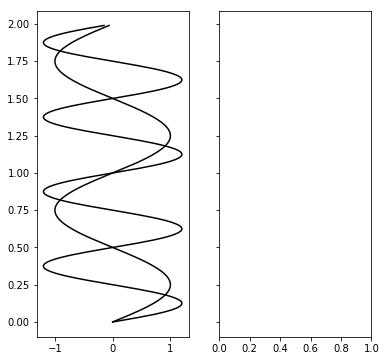

In [33]:
import matplotlib.pyplot as plt
import numpy as np


y = np.arange(0.0, 2, 0.01)
x1 = np.sin(2 * np.pi * y)
x2 = 1.2 * np.sin(4 * np.pi * y)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(6, 6))

ax1.fill_betweenx(y, 0, x1)
ax1.set_title('between (x1, 0)')

ax2.fill_betweenx(y, x1, 1)
ax2.set_title('between (x1, 1)')
ax2.set_xlabel('x')

ax3.fill_betweenx(y, x1, x2)
ax3.set_title('between (x1, x2)')

# now fill between x1 and x2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(y[where], x1[where], x2[where])
# because of edge effects over multiple contiguous regions.

fig, [ax, ax4] = plt.subplots(1, 2, sharey=True, figsize=(6, 6))
ax.plot(x1, y, x2, y, color='black')
#ax.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
#ax.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
#ax.set_title('fill_betweenx where')

# Test support for masked arrays.
#x2 = np.ma.masked_greater(x2, 1.0)
#ax4.plot(x1, y, x2, y, color='black')
#ax4.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
#ax4.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
#ax4.set_title('regions with x2 > 1 are masked')

# This example illustrates a problem; because of the data
# gridding, there are undesired unfilled triangles at the crossover
# points.  A brute-force solution would be to interpolate all
# arrays to a very fine grid before plotting.

plt.show()